# Shoes Stock Analysis

### Import Library
A Python library is a collection of related modules. It contains bundles of code that can be used repeatedly in different programs. It makes Python Programming simpler and convenient for the programmer.

In [1]:
# Import Library
import numpy as np
import pandas as pd #dataframe
from matplotlib import pyplot as plt #for data visualization
import seaborn as sns #for data visualization
from scipy import stats
import calendar
#show plots in Jupyter Notebook browser
%matplotlib inline
sns.set(rc={'figure.figsize':(12,10)})
from wordcloud import WordCloud

### Data Extraction
Data extraction is the act or process of retrieving data out of data sources for further data processing or data storage

In [2]:
# Getting the dataset from folder
df = pd.read_csv(r'Dataset\Shoes\kaggle_woman_shoes.csv')
df.head() # show first five row of the data

c:\users\asdar\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13,16,18,22,24,32,33,40,41,47,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,asins,brand,categories,colors,count,dateAdded,dateUpdated,descriptions,dimension,...,skus,sourceURLs,upc,vin,websiteIDs,weight,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Information on Data

In [3]:
df.shape

(33801, 52)

This dataset contains 33801 rows and 52 columns.

In [4]:
# Check type of data for each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33801 entries, 0 to 33800
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   33801 non-null  object 
 1   asins                2422 non-null   object 
 2   brand                32817 non-null  object 
 3   categories           33801 non-null  object 
 4   colors               19844 non-null  object 
 5   count                0 non-null      float64
 6   dateAdded            33801 non-null  object 
 7   dateUpdated          33801 non-null  object 
 8   descriptions         28425 non-null  object 
 9   dimension            1177 non-null   object 
 10  ean                  9778 non-null   float64
 11  features             27181 non-null  object 
 12  flavors              0 non-null      float64
 13  imageURLs            22309 non-null  object 
 14  isbn                 0 non-null      float64
 15  keys                 33801 non-null 

## Data Cleaning

In [5]:
#Drop columns with no value
df.drop(df.columns[[5, 12, 14, 25, 29, 36, 38, 45, 46, 48, 49, 50, 51]], axis= 1,  inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33801 entries, 0 to 33800
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   33801 non-null  object 
 1   asins                2422 non-null   object 
 2   brand                32817 non-null  object 
 3   categories           33801 non-null  object 
 4   colors               19844 non-null  object 
 5   dateAdded            33801 non-null  object 
 6   dateUpdated          33801 non-null  object 
 7   descriptions         28425 non-null  object 
 8   dimension            1177 non-null   object 
 9   ean                  9778 non-null   float64
 10  features             27181 non-null  object 
 11  imageURLs            22309 non-null  object 
 12  keys                 33801 non-null  object 
 13  manufacturer         9279 non-null   object 
 14  manufacturerNumber   31434 non-null  object 
 15  merchants            15382 non-null 

In [6]:
#Change columns type form object to string
df_str = df.copy()
all_columns = list(df.columns[[0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,19,20,21,22,23,24,26,27,28,29,30,31,32,33,34,35,36,38]]) # Creates list of all column headers
df_str[all_columns] = df[all_columns].astype(str)

In [30]:
# Investigate all the elements whithin each Feature
def unique_f():
    for column in df_str:
        unique_vals = np.unique(df_str[column])
        nr_values = len(unique_vals)
        if nr_values < 20:
            print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
        else:
            print('The number of values for feature {} :{}'.format(column, nr_values))
    return
unique_f()

The number of values for feature id :9996
The number of values for feature asins :1246
The number of values for feature brand :1361
The number of values for feature categories :894
The number of values for feature colors :2066
The number of values for feature dateAdded :7006
The number of values for feature dateUpdated :6506
The number of values for feature descriptions :7187
The number of values for feature dimension :101
The number of values for feature ean :25711
The number of values for feature features :7568
The number of values for feature imageURLs :7501
The number of values for feature keys :9980
The number of values for feature manufacturer :794
The number of values for feature manufacturerNumber :7605
The number of values for feature merchants :4890
The number of values for feature name :9494
The number of values for feature prices.amountMin :3541
The number of values for feature prices.amountMax :3414
The number of values for feature prices.availability :7 -- ['FALSE' 'In St

In [8]:
# Change columns with date into date format
df['dateAdded'] = df['dateAdded'].str.replace('[^0-9-:]', ' ')
df['dateUpdated'] = df['dateUpdated'].str.replace('[^0-9-:]', ' ')
df['prices.dateAdded'] = df['prices.dateAdded'].str.replace('[^0-9-:]', ' ')
df['prices.dateAdded'] = df['prices.dateAdded'].str.split(' ').str[0]
df['prices.dateSeen'] = df['prices.dateSeen'].str.replace('[^0-9-:]', ' ')
df['prices.dateSeen'] = df['prices.dateSeen'].str.split(' ').str[0]
df['dateAdded'] = pd.to_datetime(df['dateAdded'])
df['dateUpdated'] = pd.to_datetime(df['dateUpdated'])
df['prices.dateAdded'] = pd.to_datetime(df['prices.dateAdded'])
df['prices.dateSeen'] = pd.to_datetime(df['prices.dateSeen'])

## Data Wrangling and Visualization

Text(0, 0.5, 'Quantity')

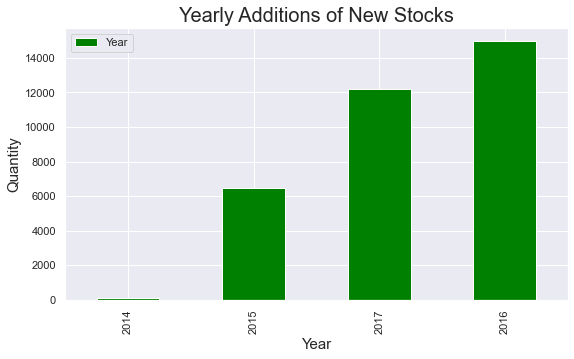

In [9]:
# Analyse stock added by year
df_year = df.copy()
df_year.reset_index(inplace=True)
df_year['Year'] = pd.DatetimeIndex(df_year["dateAdded"]).year
y = df_year['Year'].value_counts(ascending=True)
df2 = pd.DataFrame(y)
df2.plot.bar(figsize=(9, 5), color='green')
plt.title('Yearly Additions of New Stocks', size =20)
plt.xlabel('Year', size =15)
plt.ylabel('Quantity', size =15)

### Insight:
1. The number of shoe stocks added increases year after year, with the most in 2016.
2. The number of shoe stocks added is expected to increase further in the coming year.

Text(0, 0.5, 'Quantity')

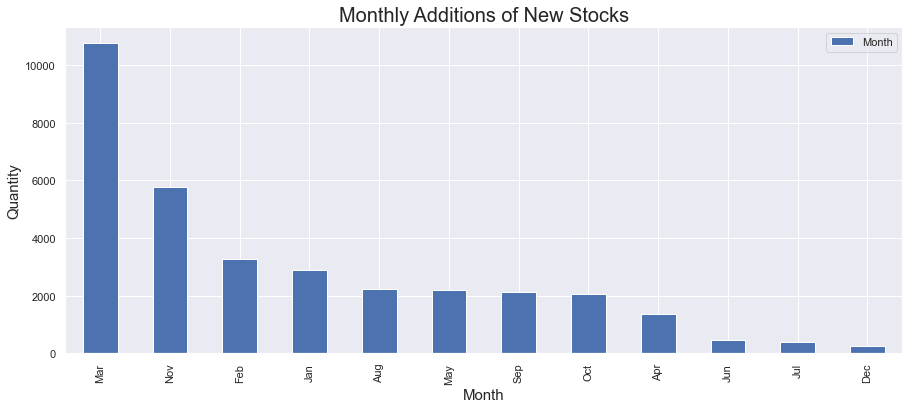

In [63]:
# Analyse stock added by month
df_date = df.copy()
df_date.reset_index(inplace=True)
df_date['Month'] = pd.DatetimeIndex(df_date["dateAdded"]).month
sort_order = ['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df_date['Month'] = df_date['Month'].apply(lambda x: calendar.month_abbr[x])
df_date.index = pd.CategoricalIndex(df_date['Month'], categories=sort_order, ordered=True)
df_date = df_date.sort_index().reset_index(drop=True)
s = df_date['Month'].value_counts()
df1 = pd.DataFrame(s)
df1.plot.bar(figsize=(15, 6))
plt.title('Monthly Additions of New Stocks', size =20)
plt.xlabel('Month', size =15)
plt.ylabel('Quantity', size =15)

### Insight:
1. New stocks were mostly added in the months of March, November, and February.
2. New stocks is rarely added during the months of June, July, and December.

Total number of shoes with brand information: 32817


Text(0, 0.5, 'Brand')

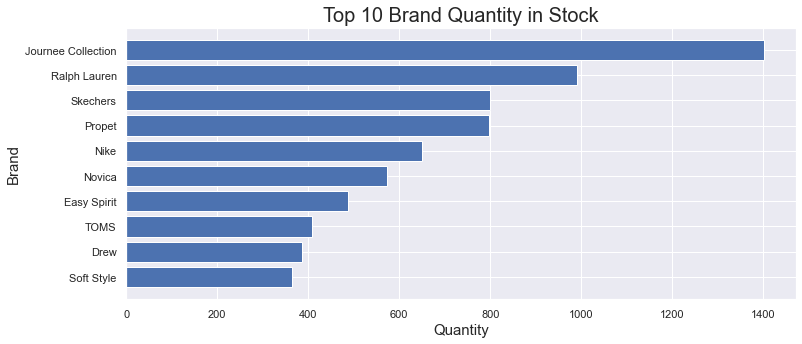

In [23]:
# Brand Analysis
df_brand = df.copy()
df_brand = df_brand.replace({'brand':{'nan':np.nan}}).dropna(subset=['brand'])
print('Total number of shoes with brand information:', len(df_brand))
b = df_brand['brand'].value_counts()
df2 = pd.DataFrame(b)
df3 = df2.head(10)
df3 = df3.rename({'brand': 'Count'}, axis=1)
df3['Brand'] = df3.index
df3 = df3.sort_values(by='Count', ascending=True)
plt.figure(figsize=(12,5))
plt.barh(df3['Brand'], df3['Count'])
plt.title('Top 10 Brand Quantity in Stock', size =20)
plt.xlabel('Quantity', size =15)
plt.ylabel('Brand', size =15)

In [65]:
df2 = pd.DataFrame(b)
df3 = df2[df2['brand'] == 1]
print(len(df3))

282


### Insight:
1. The brand Journess Collection has the most shoes in stock followed by Ralph Lauren and Skechers.
2. Total number of brands with only one stock left are 282.

Total number of shoes with categories information: 33801


Text(0, 0.5, 'Categories')

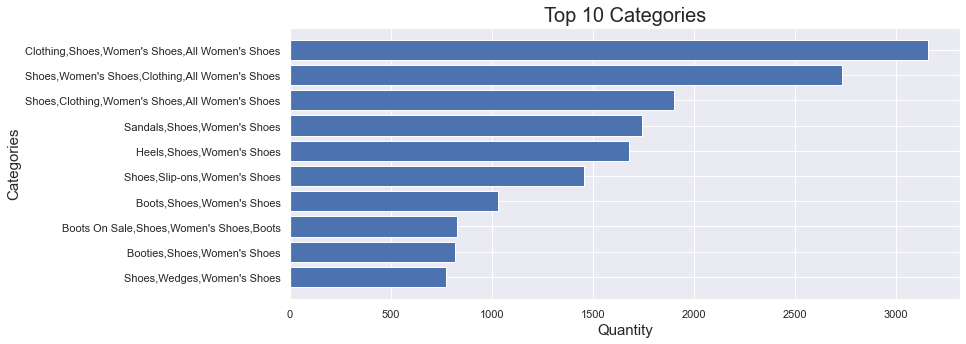

In [13]:
#Categories Analysis
df_cat = df.copy()
df_cat = df_cat.replace({'categories':{'nan':np.nan}}).dropna(subset=['categories'])
print('Total number of shoes with categories information:', len(df_cat))
b = df_cat['categories'].value_counts()
df2 = pd.DataFrame(b)
df3 = df2.head(10)
df3 = df3.rename({'categories': 'Count'}, axis=1)
df3['categories'] = df3.index
df3 = df3.sort_values(by='Count', ascending=True)
plt.figure(figsize=(12,5))
plt.barh(df3['categories'], df3['Count'])
plt.title('Top 10 Categories', size =20)
plt.xlabel('Quantity', size =15)
plt.ylabel('Categories', size =15)

### Insight:
1. The majority of the shoes in stock are categorised as Clothing, Shoes, Women's Shoes, and All Women's Shoes.

Total number of shoes with color information: 19844


Text(0, 0.5, 'Quantity')

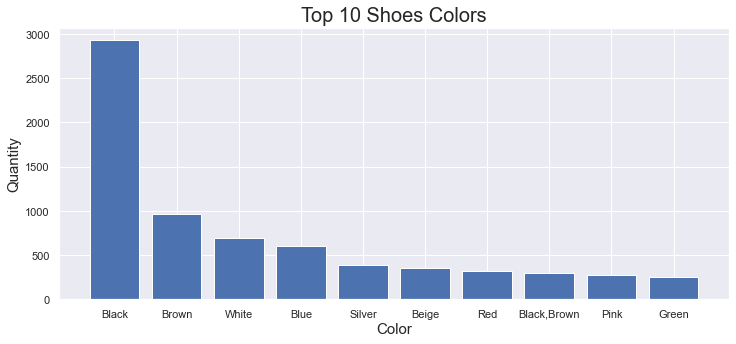

In [14]:
#Shoe Color Analysis
df_col = df.copy()
df_col = df_col.replace({'colors':{'nan':np.nan}}).dropna(subset=['colors'])
print('Total number of shoes with color information:', len(df_col))
b = df_col['colors'].value_counts()
df2 = pd.DataFrame(b)
df3 = df2.head(10)
df3 = df3.rename({'colors': 'Count'}, axis=1)
df3['colors'] = df3.index
df3 = df3.sort_values(by='Count', ascending=False)
plt.figure(figsize=(12,5))
plt.bar(df3['colors'], df3['Count'])
plt.title('Top 10 Shoes Colors', size =20)
plt.xlabel('Color', size =15)
plt.ylabel('Quantity', size =15)

### Insight:
1. The majority of the shoes in stock are black.

Total number of shoes with size information: 1177


Text(0, 0.5, 'Size')

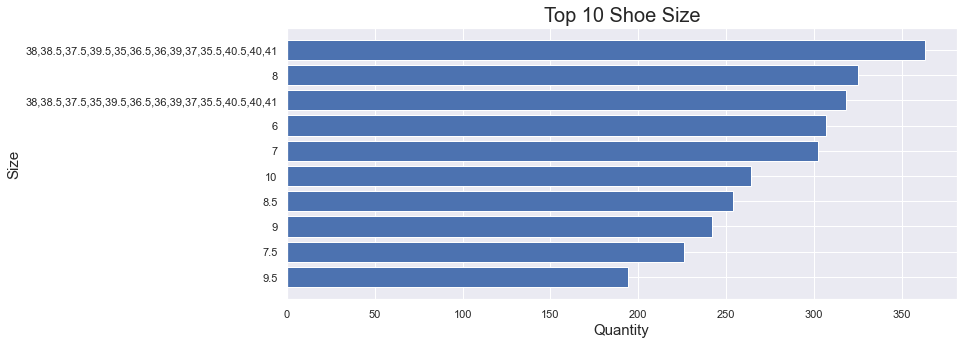

In [21]:
#Shoe Size Analysis
df_size = df.copy()
df_size = df_size.replace({'sizes':{'nan':np.nan}}).dropna(subset=['sizes'])
print('Total number of shoes with size information:', len(df_dimen))
b = df_size['sizes'].value_counts()
df2 = pd.DataFrame(b)
df3 = df2.head(10)
df3 = df3.rename({'sizes': 'Count'}, axis=1)
df3['sizes'] = df3.index
df3 = df3.sort_values(by='Count', ascending=True)
plt.figure(figsize=(12,5))
plt.barh(df3['sizes'], df3['Count'])
plt.title('Top 10 Shoe Size', size =20)
plt.xlabel('Quantity', size =15)
plt.ylabel('Size', size =15)

### Insight:
1. The majority of the shoes have size range from 38-41.

Total number of shoes with dimension information: 1177


Text(0, 0.5, 'Dimensions')

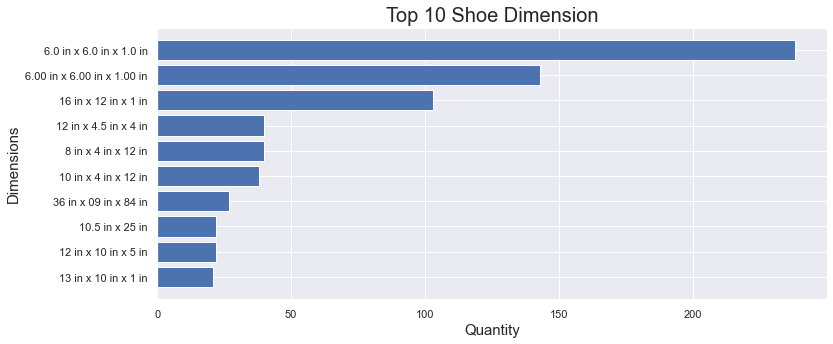

In [22]:
#Shoe Size Analysis
df_dimen = df.copy()
df_dimen = df_dimen.replace({'dimension':{'nan':np.nan}}).dropna(subset=['dimension'])
print('Total number of shoes with dimension information:', len(df_dimen))
b = df_dimen['dimension'].value_counts()
df2 = pd.DataFrame(b)
df3 = df2.head(10)
df3 = df3.rename({'dimension': 'Count'}, axis=1)
df3['dimension'] = df3.index
df3 = df3.sort_values(by='Count', ascending=True)
plt.figure(figsize=(12,5))
plt.barh(df3['dimension'], df3['Count'])
plt.title('Top 10 Shoe Dimension', size =20)
plt.xlabel('Quantity', size =15)
plt.ylabel('Dimensions', size =15)

### Insight:
1. The majority of the shoes are (6x6x1) inches in dimension.

Total AUD currency :  11
Total CAD currency :  1008
Total EUR currency :  101
Total GBP currency :  1
Total USD currency :  32680


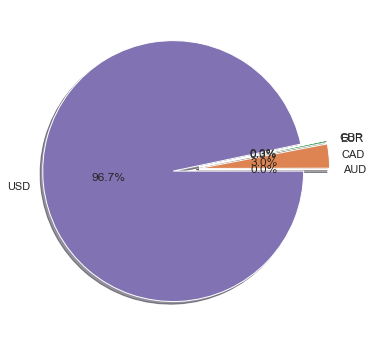

In [35]:
#Price Analysis
df_cur = df.copy()
df_cur = df_cur.rename(columns={'prices.currency': 'prices_currency'})
len_AUD = len(df_cur["prices_currency"][df_cur.prices_currency == "AUD"])
len_CAD = len(df_cur["prices_currency"][df_cur.prices_currency == "CAD"])
len_EUR = len(df_cur["prices_currency"][df_cur.prices_currency == "EUR"])
len_GBP = len(df_cur["prices_currency"][df_cur.prices_currency == "GBP"])
len_USD = len(df_cur["prices_currency"][df_cur.prices_currency == "USD"])
'AUD' 'CAD' 'EUR' 'GBP' 'USD'

arr = np.array([len_AUD, len_CAD, len_EUR, len_GBP, len_USD]) 
labels = ['AUD', 'CAD', 'EUR', 'GBP', 'USD'] 
print("Total AUD currency : ", len_AUD)
print("Total CAD currency : ", len_CAD)
print("Total EUR currency : ", len_EUR)
print("Total GBP currency : ", len_GBP)
print("Total USD currency : ", len_USD)

plt.subplots(figsize=(8, 6))
plt.pie(arr, labels=labels, shadow=True, autopct='%1.1f%%', pctdistance=0.5, explode = [0.1,0.1,0.1,0.1,0.1]) 
plt.show()

### Insight:
1. Most of the shoe price are in USD currency.

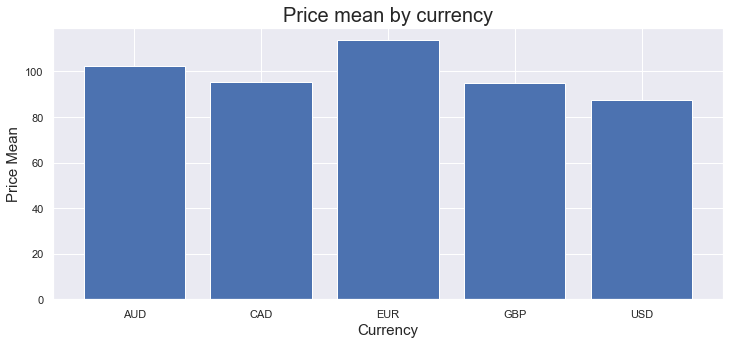

,prices.currency,prices.amountMin
0,AUD,102.374545
1,CAD,95.464782
2,EUR,113.550495
3,GBP,94.990000
4,USD,87.329726


In [47]:
df_price = df.copy()
aggregation_functions = {'prices.amountMin': 'mean'}
df_price = df_price.groupby(['prices.currency']).aggregate(aggregation_functions).reset_index()
plt.figure(figsize=(12,5))
plt.bar(df_price['prices.currency'], df_price['prices.amountMin'])
plt.title('Price mean by currency', size =20)
plt.xlabel('Currency', size =15)
plt.ylabel('Price Mean', size =15)
plt.show()
df_price

### Insight:
1. The currency EUR has the highest mean price, while the currency USD has the lowest.

mean(black): 87.65579834916126 
median(yellow): 52.99 
mode(blue): [39.99]


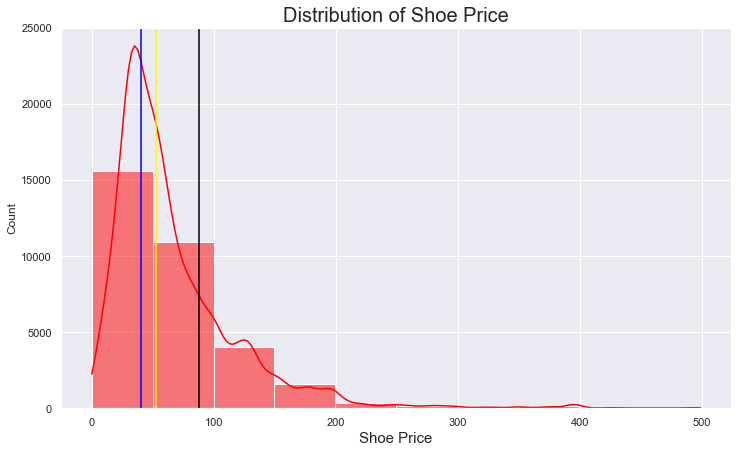

In [72]:
plt.subplots(figsize=(12, 7))
df_dis = df.copy()
#df_dis['prices.amountMin'] = df_dis['prices.amountMin'].astype(float)
df_dis = df_dis[df_dis['prices.amountMin'] < 500.0]
sns.histplot(data=df_dis, x="prices.amountMin", kde=True, color = 'red', bins=10)
plt.title('Distribution of Shoe Price', size=20)
plt.xlabel('Shoe Price', size =15)
mean = df["prices.amountMin"].mean()
median = df["prices.amountMin"].median()
mode = df["prices.amountMin"].mode()
mode = list(mode)
plt.axvline(mean, 0,1, color = 'black')
plt.axvline(median, 0,1, color = 'yellow')
plt.axvline(mode, 0,1, color = 'blue')
print('mean(black):', mean, '\nmedian(yellow):', median, '\nmode(blue):', mode)

### Insight:
1. The majority of the shoe prices range from 0 to 50.00 USD.
2. The mean, median and mode for shoe price are 87.66 USD, 52.99 USD and 39.99 USD, respectively.
2. The Price distribution is skewed to the right (right skewed distribution).